 # AI Community @ Семинар № 5
 ## Уменьшение размерности с PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as sla
from sklearn import decomposition
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style='white')

### PCA помогает классификации

Исследуем [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) из `sklearn`.

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class (Predicted attribute: class of iris plant): 
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica

In [2]:
# Загрузим данные из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
X.shape

(150, 4)

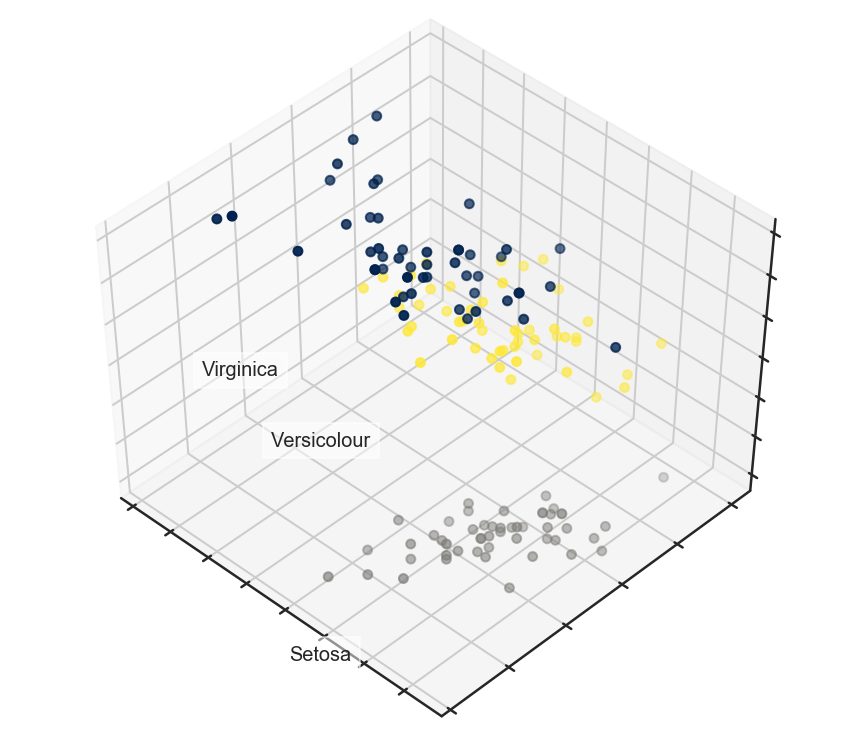

In [16]:
# Нарисуем данные в 3D
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.cividis)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

Предскажем тип цветка по его параметрам с помощью неглубокого дерева решений.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

clf = DecisionTreeClassifier(max_depth=2, random_state=41)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


Применим PCA для визуализации:

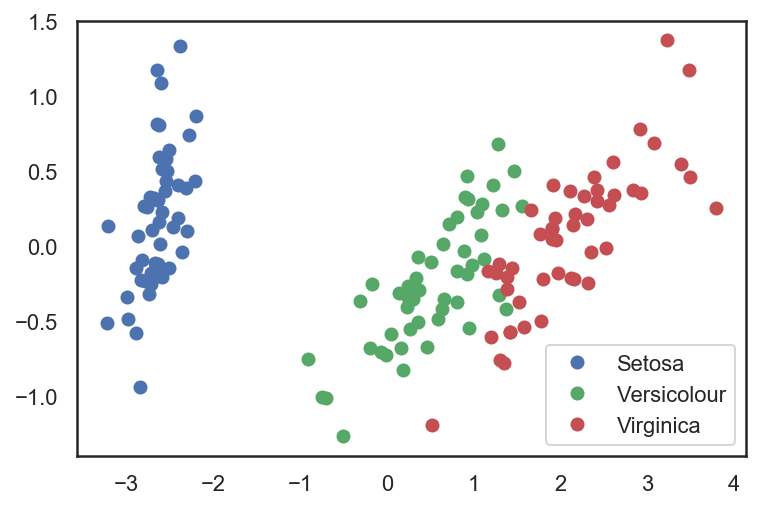

In [7]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

Обучим классификатор на измененных данных:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=41)

clf = DecisionTreeClassifier(max_depth=2, random_state=41)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.97778


### PCA помогает визуализации

Теперь поработаем с уже знакомым набором данных [MNIST](http://yann.lecun.com/exdb/mnist/).

In [9]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [12]:
X.shape, y.shape

((1797, 64), (1797,))

Для начала, посмотрим на данные:

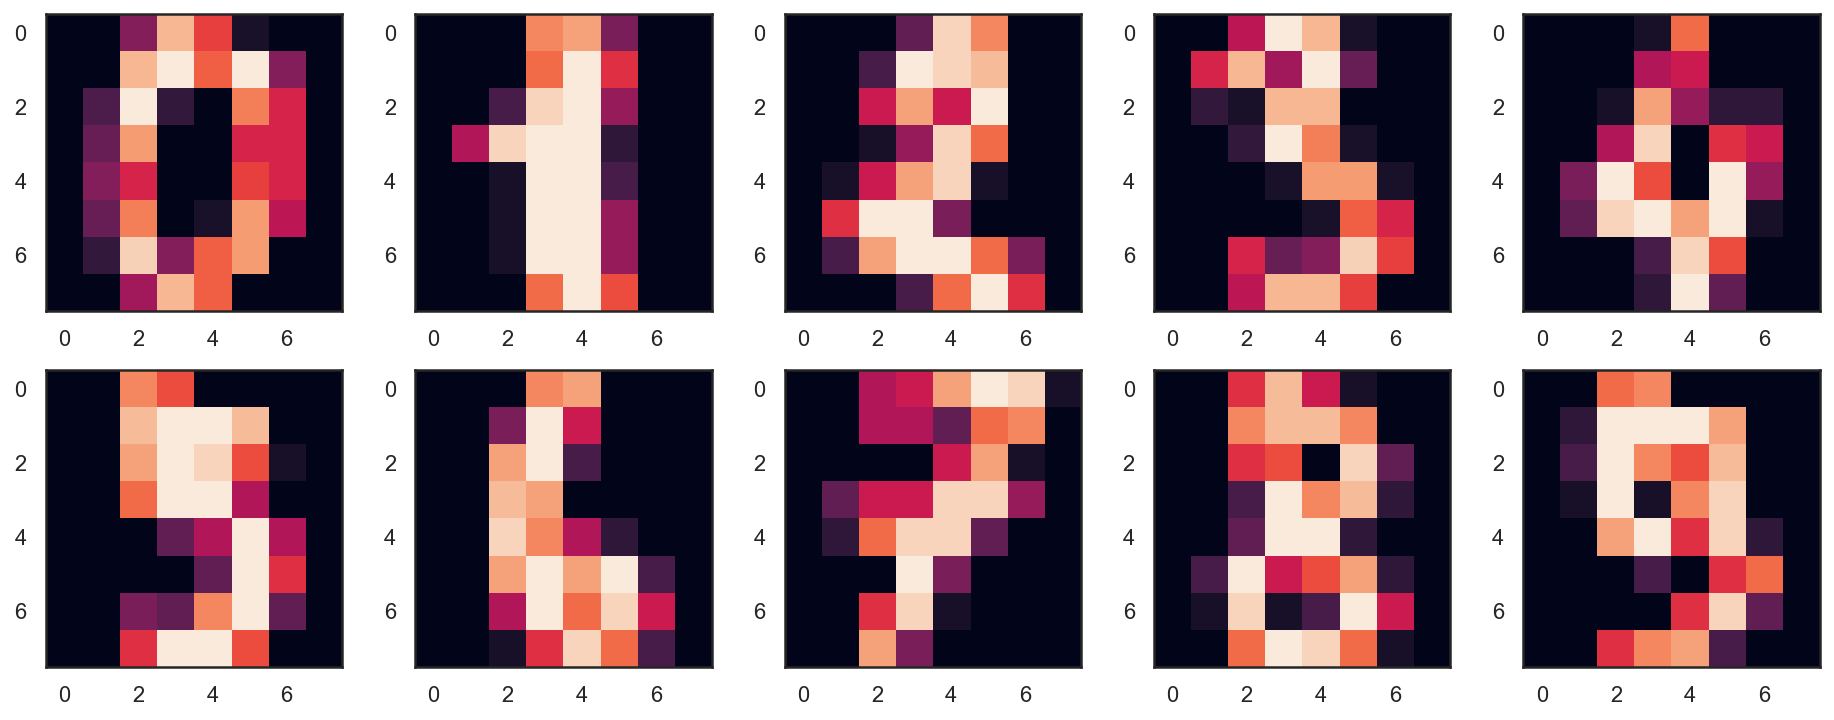

In [10]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Каждый пиксель - это признак, поэтому размерность наших данных - 64.  
Уменьшим размерность до 2 и посмотрим, что получится.

Projecting 64D data to 2D


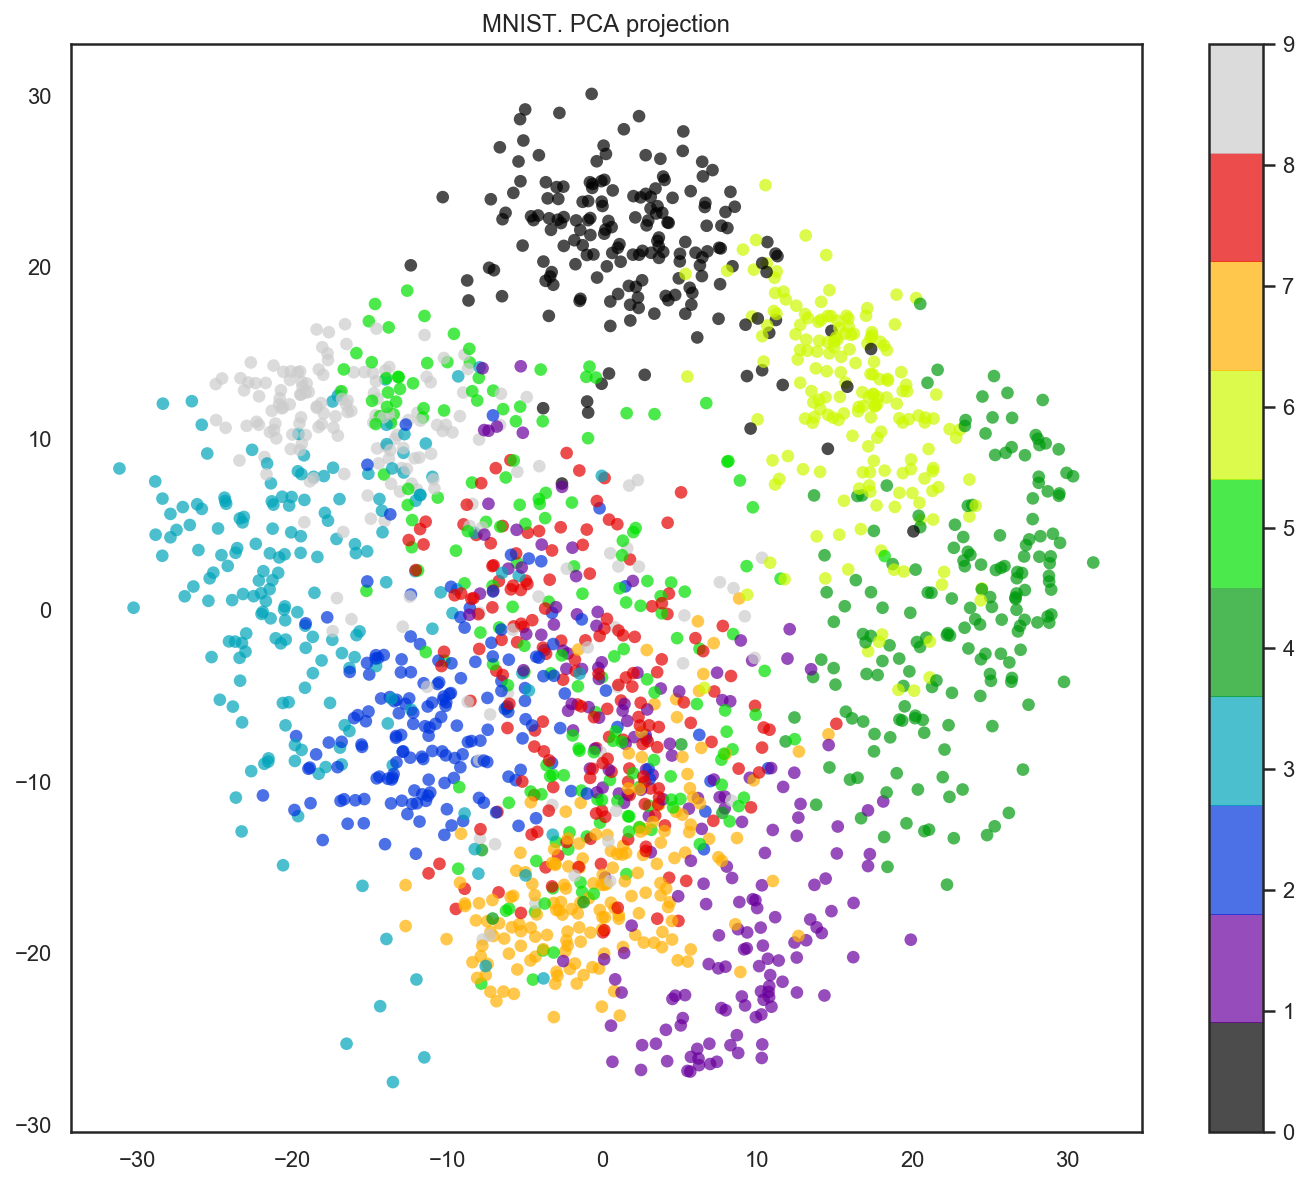

In [22]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting {}D data to 2D'.format(X.shape[1]))

plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

In [13]:
import numpy as np
from sklearn.manifold import TSNE, Isomap
from sklearn.datasets import load_digits, fetch_olivetti_faces

from skimage.io import *
from skimage.transform import resize

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style='white')

### Примеры визуализации с t-SNE

In [15]:
tsne = TSNE(n_components=2)
digits2d = tsne.fit_transform(X, y)

In [16]:
def plot_2d_data(data, labels, labels_limit=10):
    plt.figure(figsize=(10, 10))
    
    unique_labels = np.sort(np.unique(labels))
    for i, label in enumerate(unique_labels):
        same_objects = data[labels == label]
        plt.scatter(same_objects[:, 0], same_objects[:, 1], label=str(label), alpha=0.3)
        
        if i + 1 >= labels_limit:
            break
    
    plt.legend(loc='best')
    
def plot_2d_images(images, points, img_size=(20, 20)):    
    size = points[:, 0].max() - points[:, 0].min(), points[:, 1].max() - points[:, 1].min()
    plot_size = int(size[0]) * 10, int(size[1]) * 10
    size_diff = img_size[0] * 3, img_size[1] * 3
    plot_size = plot_size[0] + size_diff[0], plot_size[1] + size_diff[1]
    
    plot_points = (points - points.min(axis=0)) * 10 + 10
    out_plot = np.ones(shape=plot_size)
    for i, point in enumerate(plot_points):
        img = images[i]
        img = resize(img, img_size)
        x, y = int(point[0]), int(point[1])
        out_plot[x - img_size[0]//2:x + img_size[0]//2, y - img_size[1]//2:y + img_size[1]//2] = img
    
    plt.figure(figsize=(15, 15))
    imshow(out_plot)

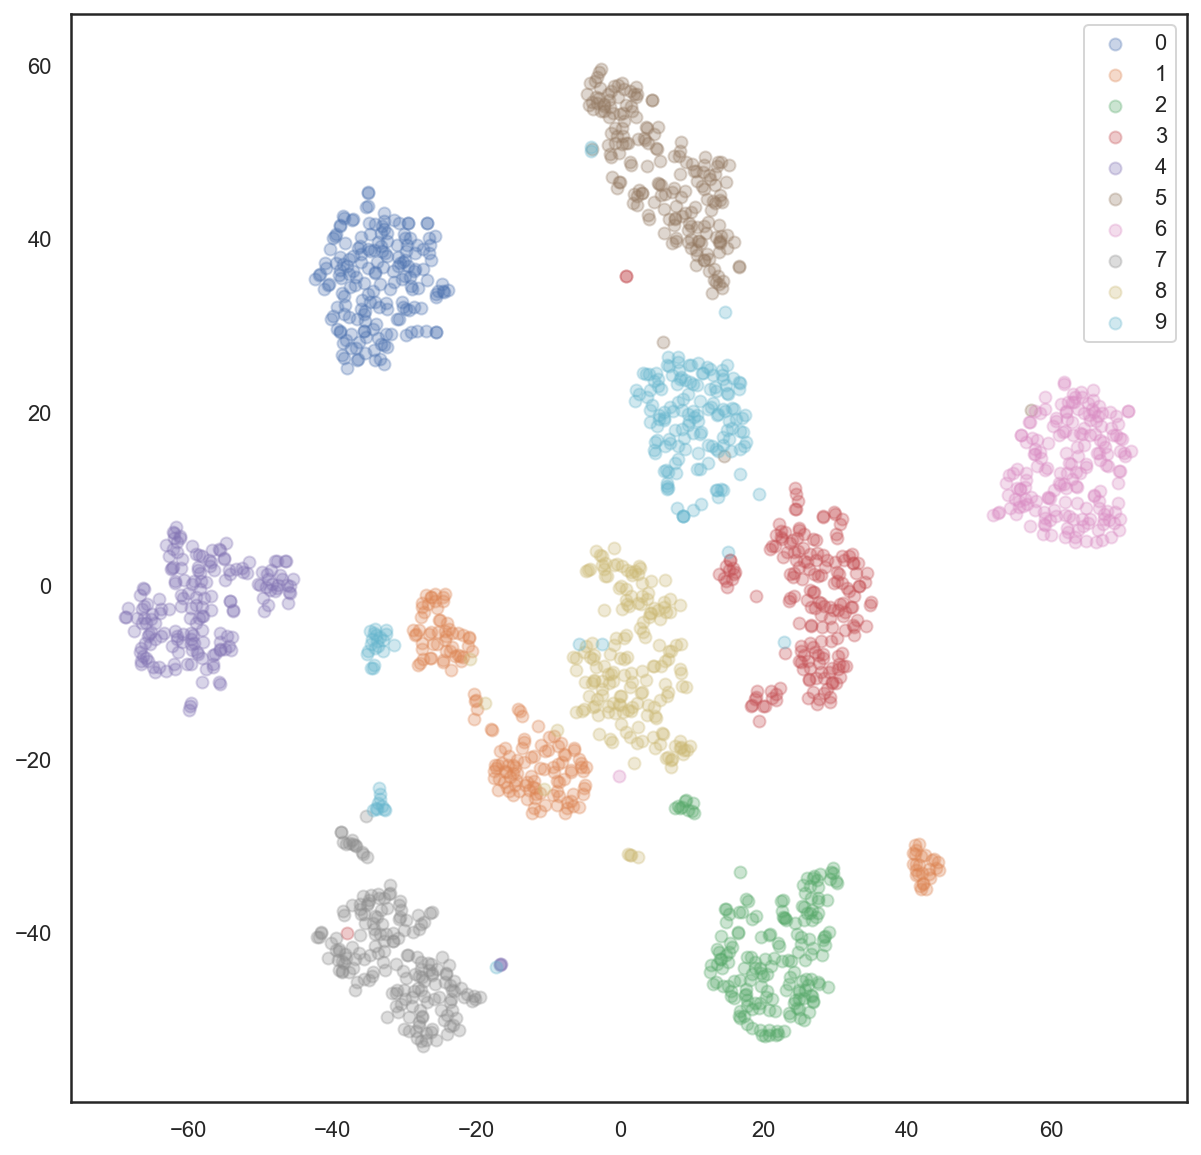

In [17]:
plot_2d_data(digits2d, y)

/usr/local/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


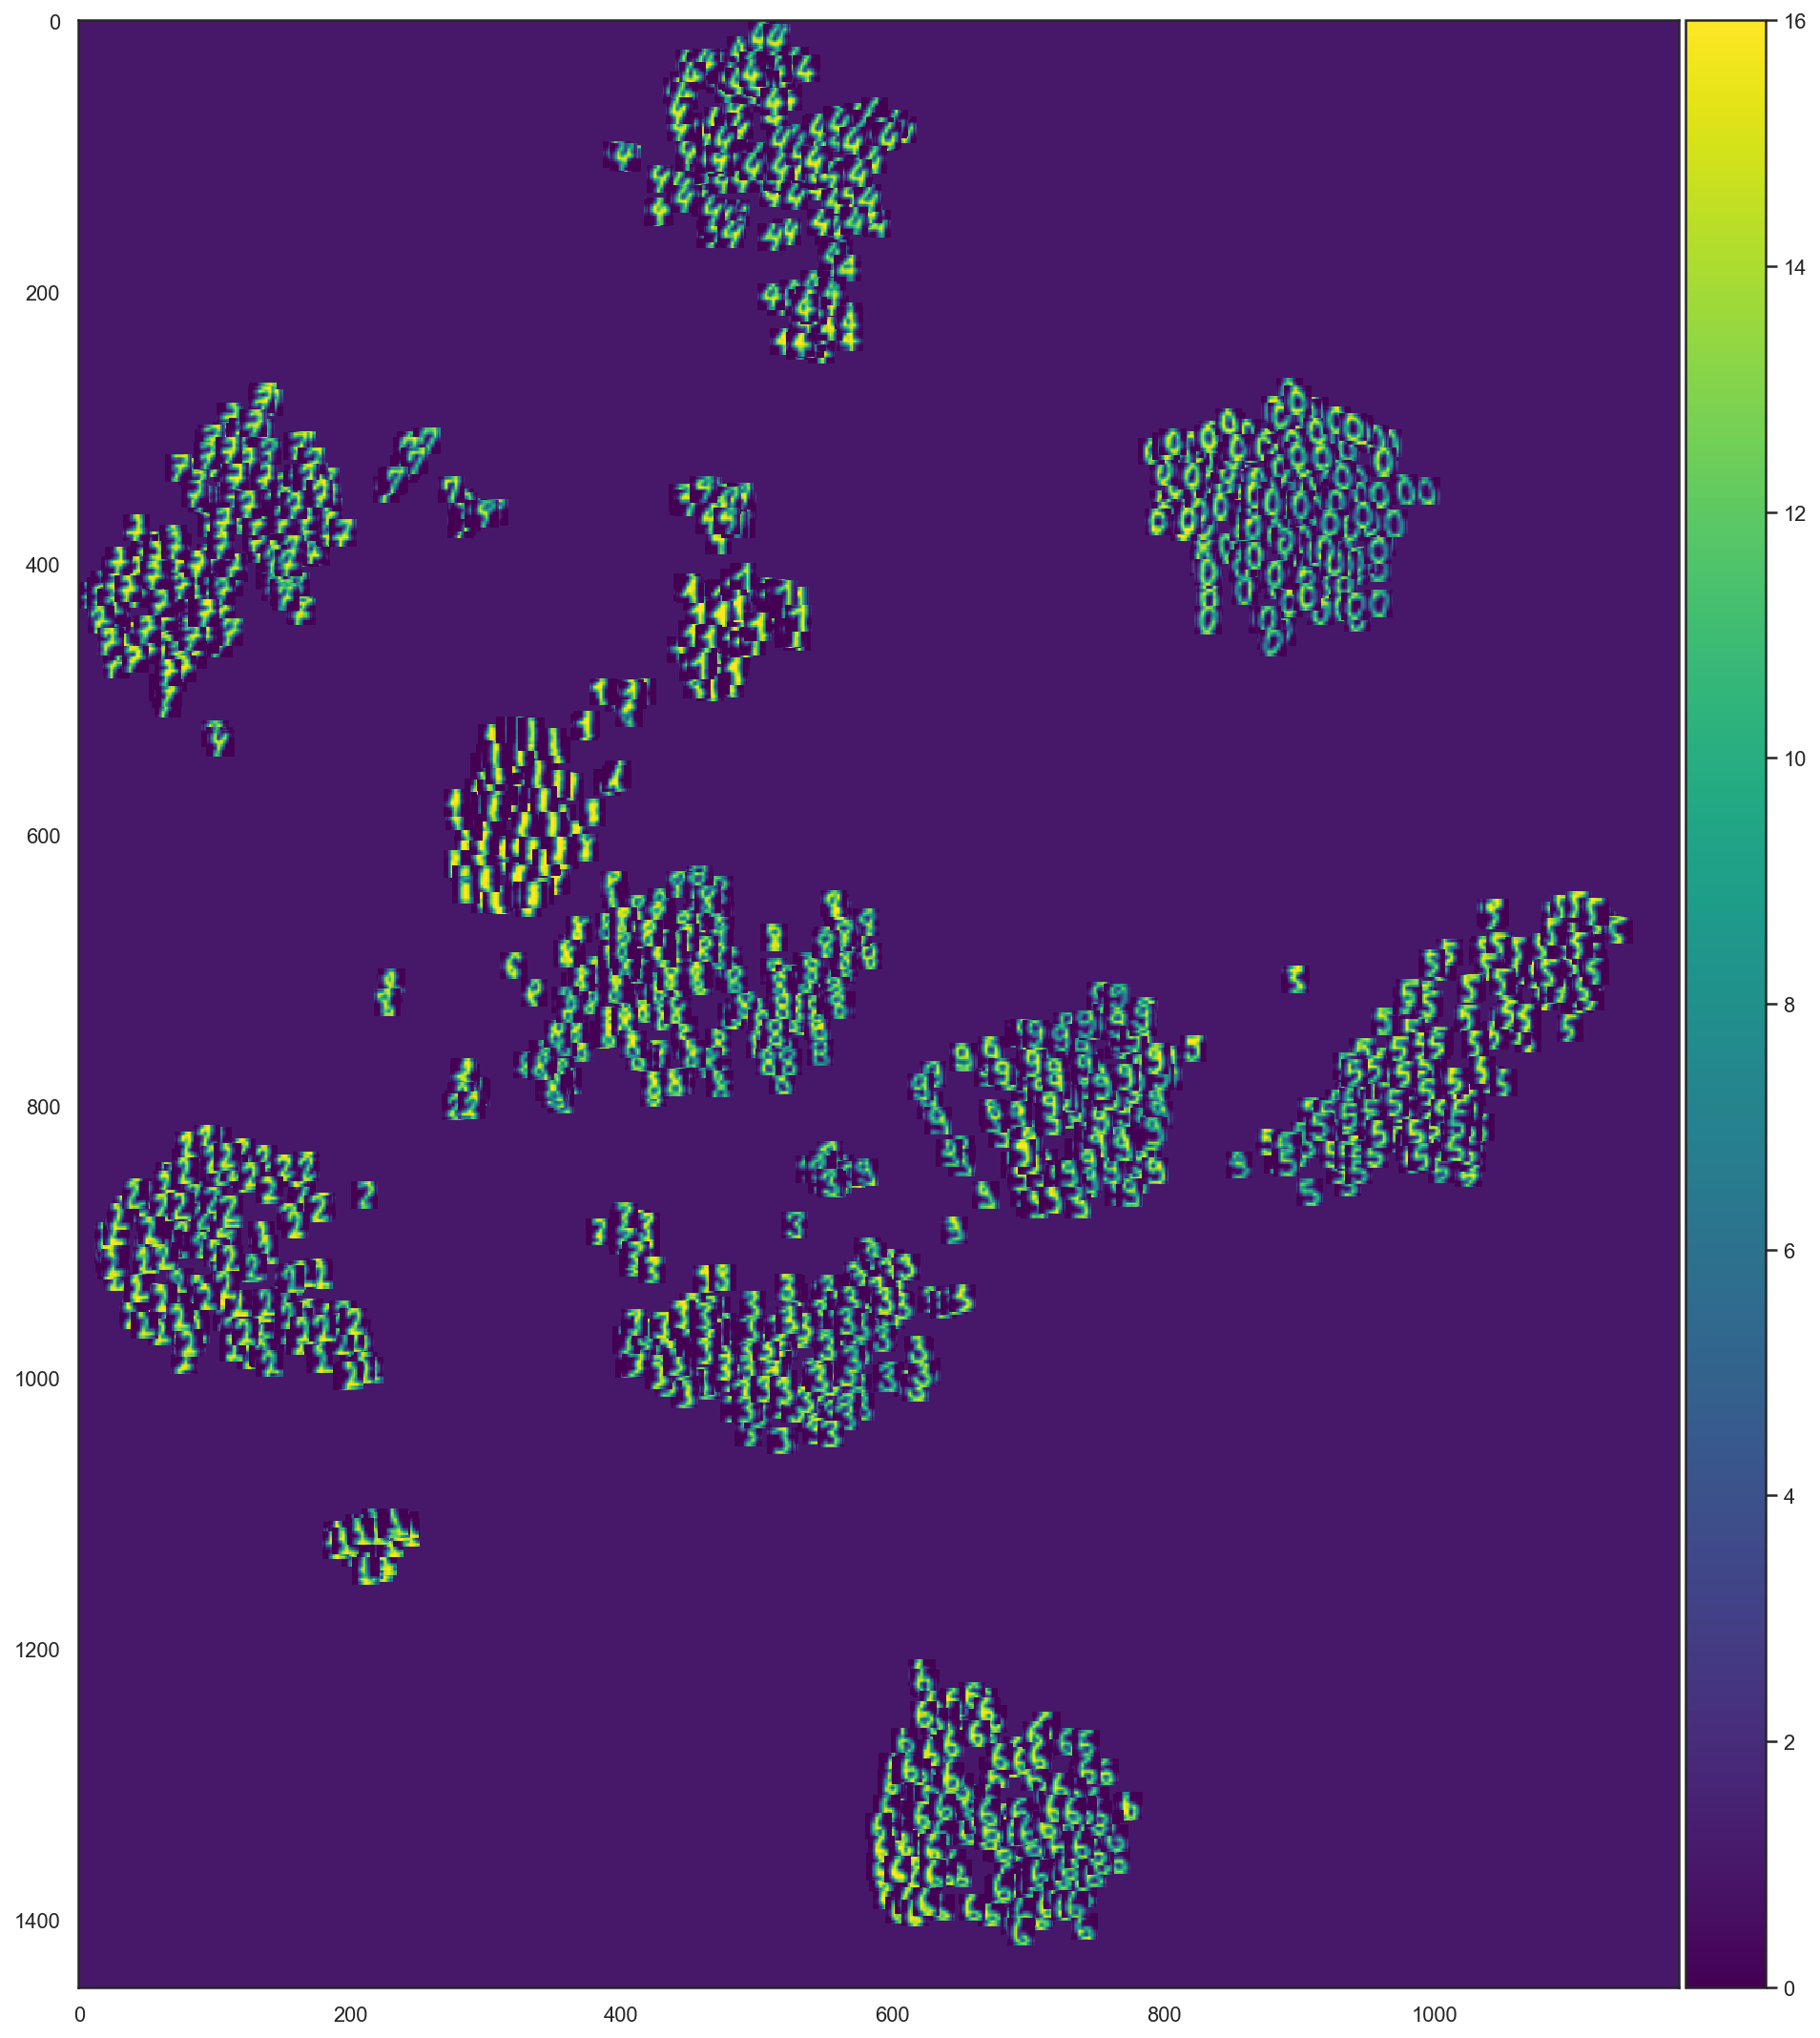

In [18]:
digits_imgs = digits.images
plot_2d_images(digits_imgs, digits2d)

#### t-SNE на лицах из датасета Olivetti
This dataset contains a set of face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge

The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms.
The “target” for this database is an integer from 0 to 39 indicating the identity of the person pictured; however, with only 10 examples per class, this relatively small dataset is more interesting from an unsupervised or semi-supervised perspective.


In [19]:
faces = fetch_olivetti_faces()
faces_ravel = faces.data
faces_images = faces.images
faces_labels = faces.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/aelita/scikit_learn_data


In [20]:
tsne = TSNE(n_components=2)
faces_tsne = tsne.fit_transform(faces_ravel)

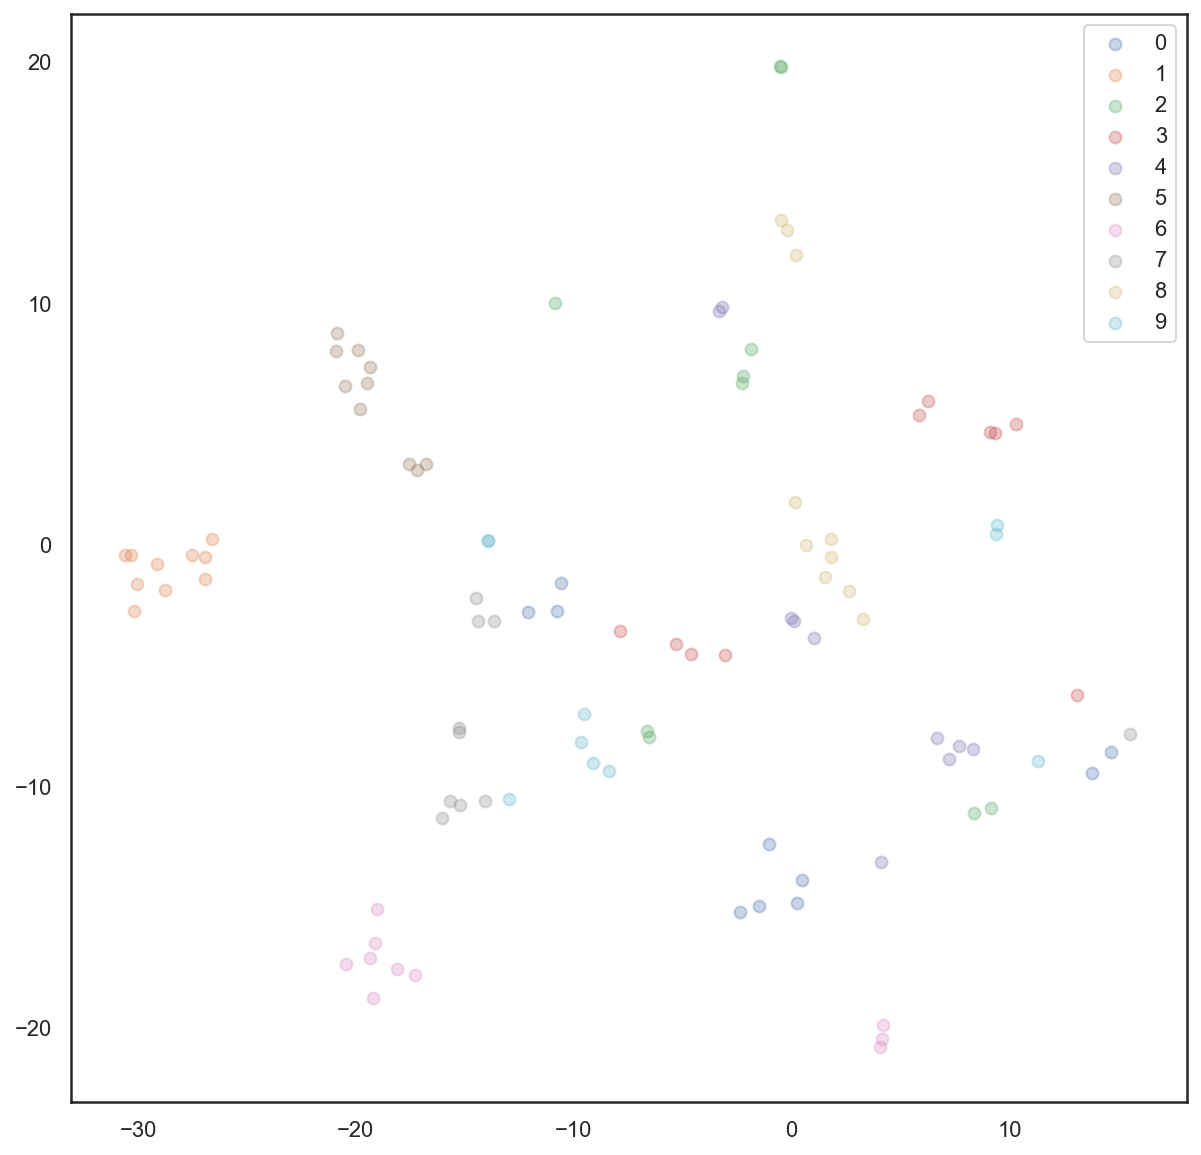

In [21]:
plot_2d_data(faces_tsne, faces_labels)

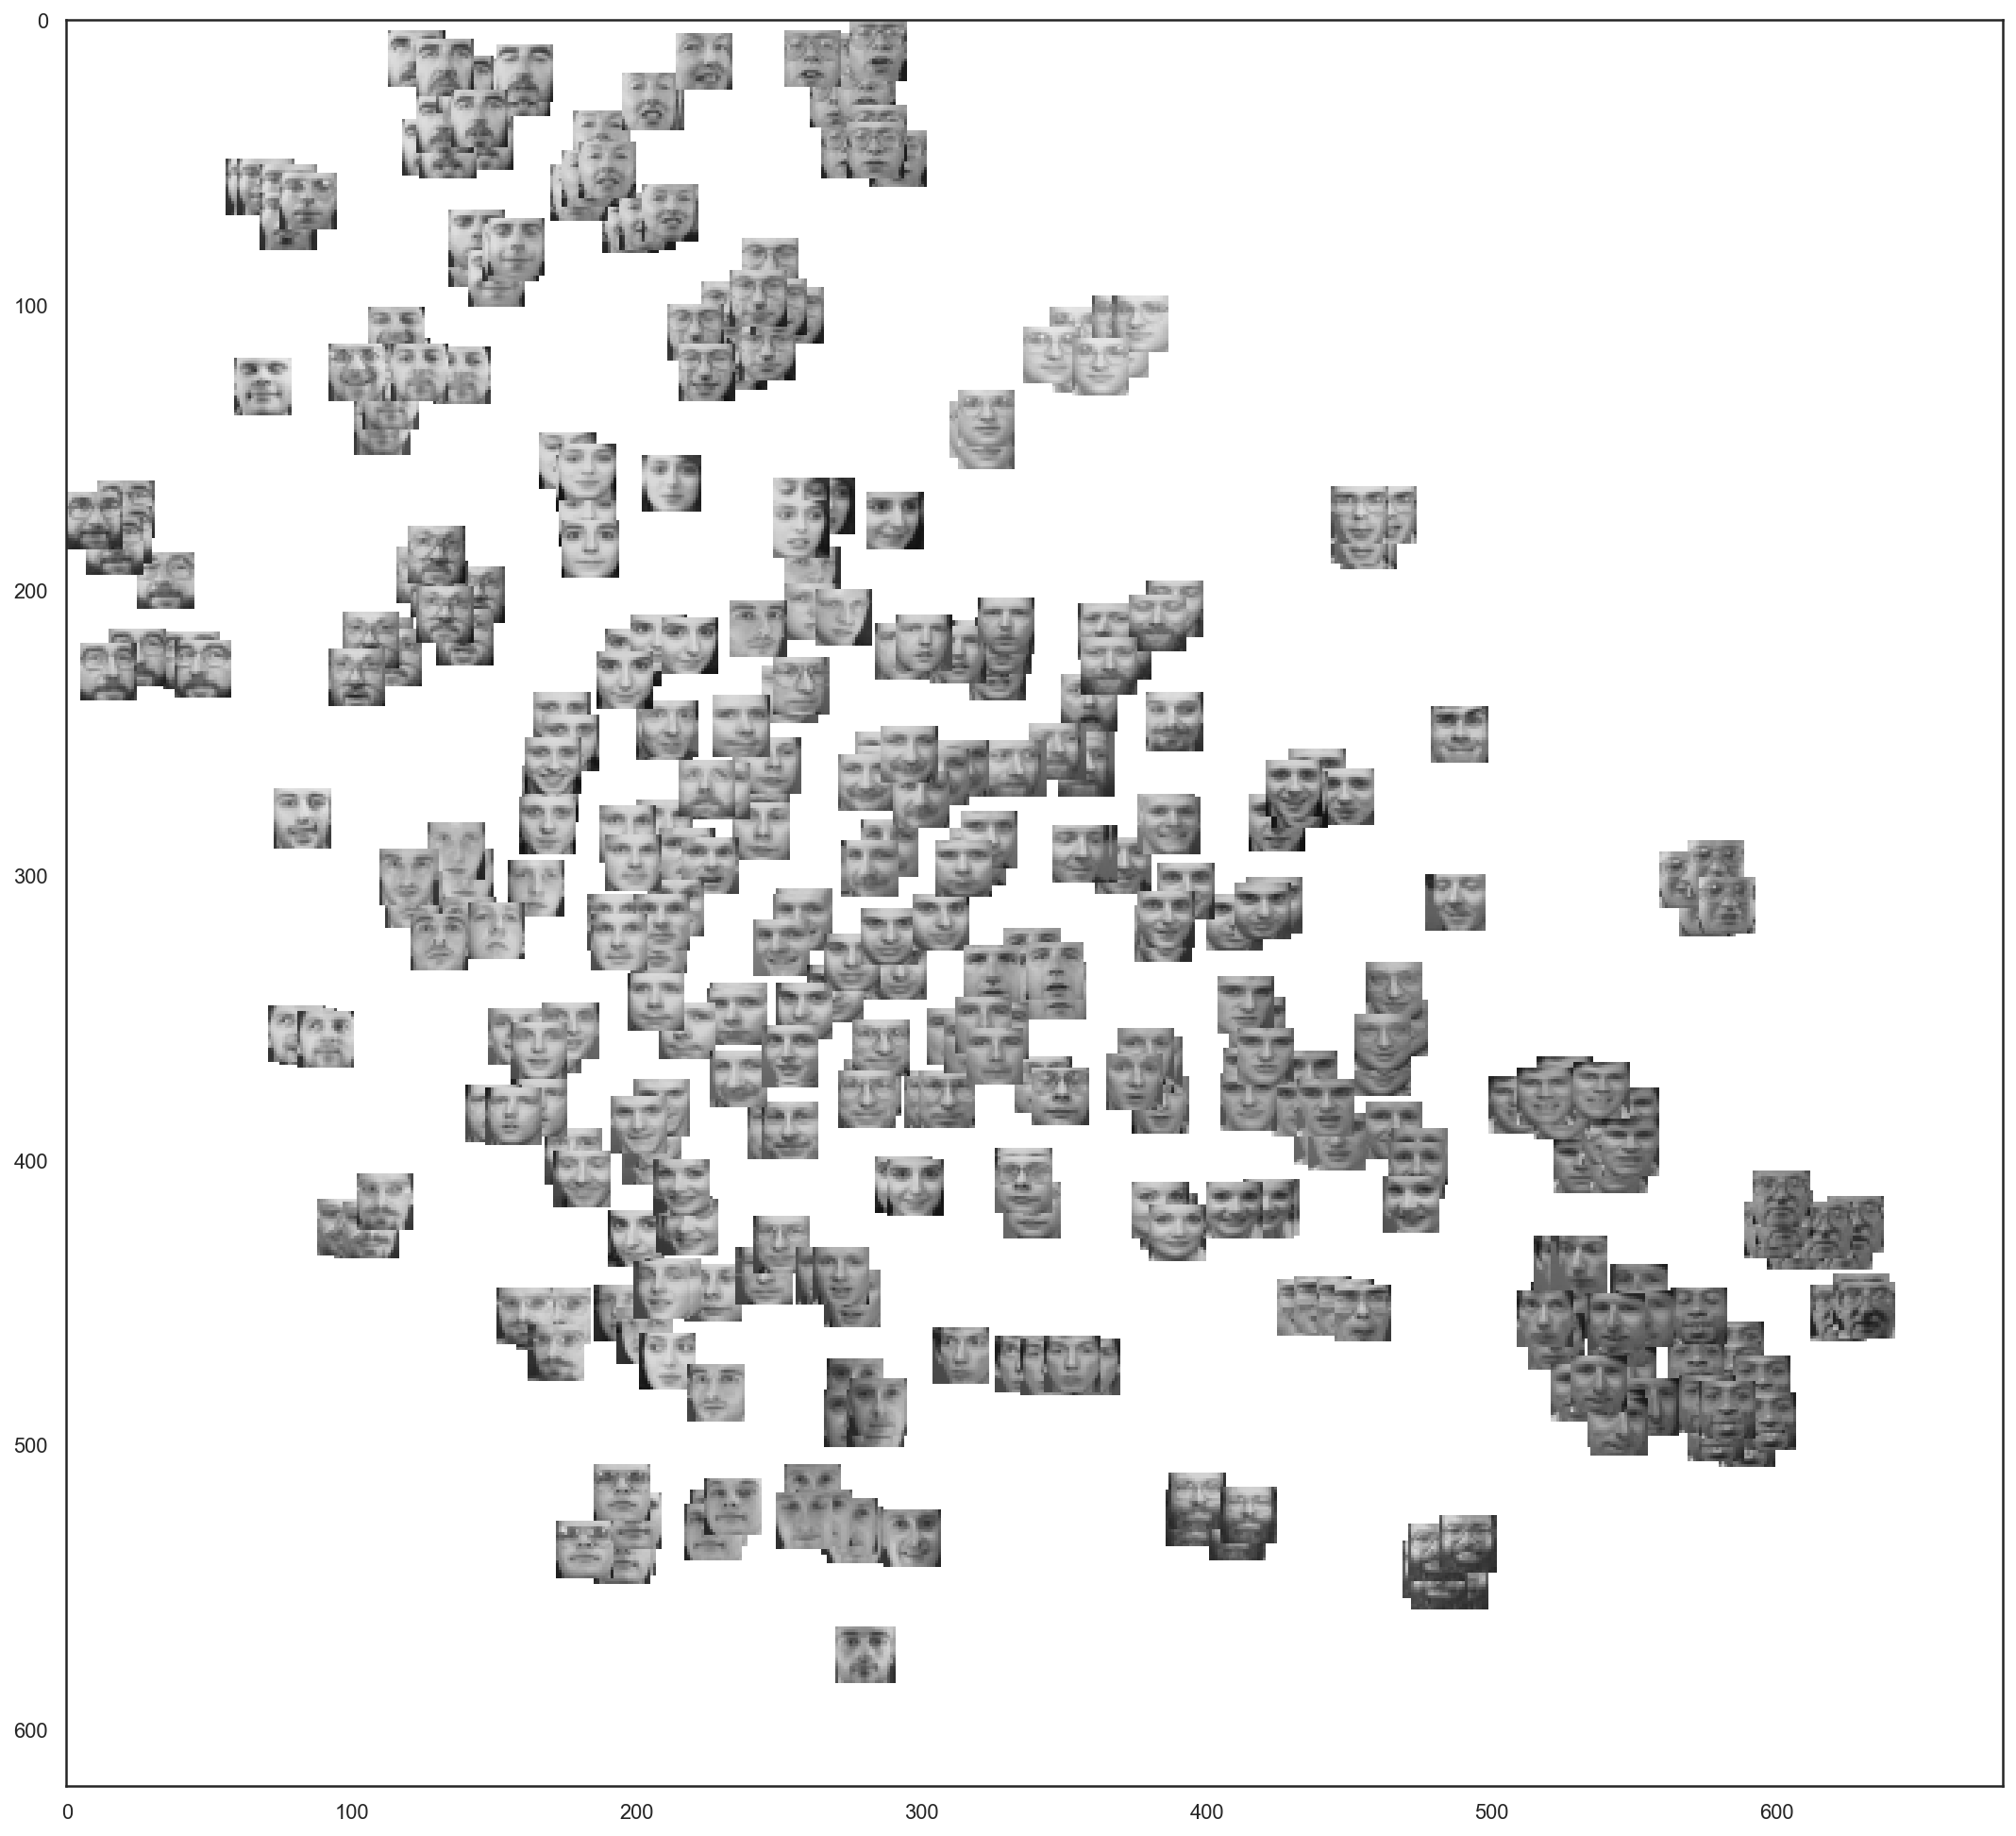

In [22]:
plot_2d_images(faces_images, faces_tsne, img_size=(20, 20))